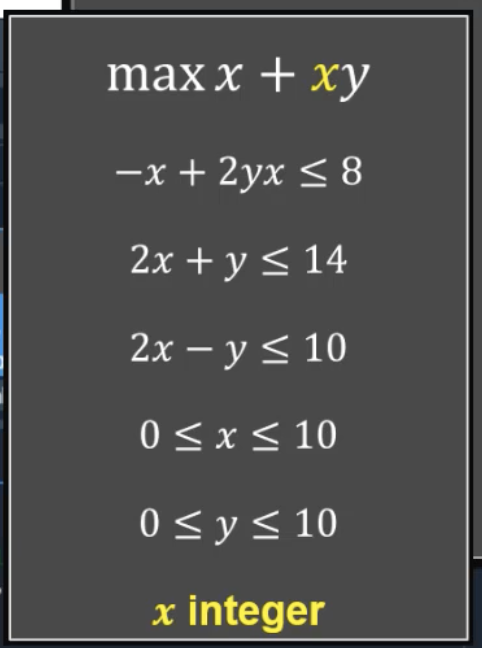

In [3]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

model.x = pyo.Var(within=Integers, bounds=(0,10))
model.y = pyo.Var(bounds=(0,10))
x = model.x
y = model.y

model.C1 = pyo.Constraint(expr= -x+2*y*x<=8)
model.C2 = pyo.Constraint(expr= 2*x+y<=14)
model.C3 = pyo.Constraint(expr= 2*x-y<=10)

model.obj = pyo.Objective(expr= x+y*x, sense=maximize)

opt = SolverFactory('mindtpy')
opt.solve(model, mip_solver='glpk', nlp_solver='ipopt')

model.pprint()

x_value = pyo.value(x)
y_value = pyo.value(y)

print('\n---------------------------------------------------------------------')
print('x=',x_value)
print('y=',y_value)

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.0 :    10 : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 1.3000000004986838 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x + y*x

3 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : - x + 2*y*x :   8.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  14.0 :   True
    C3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x - y :  10.0 :   True

6 Declarations: x y C1 C2 C3 obj

-------------